In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize

In [2]:
filenames = []
files_path = "./data/doyle/"
for file in os.listdir(files_path):
    if file.endswith(".txt"):
        filenames.append(os.path.join(files_path, file))

In [3]:
file_contents = []

for filename in filenames :
    with open(filename, 'r', encoding='utf-8-sig') as fo :
        file_text = fo.read()
        file_contents.append(file_text)

In [4]:
file_sentence_lengths = []
for file_content in file_contents:
    sentences = sent_tokenize(file_content)
    sentence_words = [word_tokenize(s) for s in sentences]
    sentence_lengths = [len(w) for w in sentence_words]
    file_sentence_lengths.append(sentence_lengths)
    
    

In [5]:
df_list = []
for ind, filename in enumerate(filenames) :
    s = file_sentence_lengths[ind]
    indices = [ind for ind in range(len(s))]
    file = filename.split('/')[-1].split('.')[0]
    print(file)
    df = pd.DataFrame({'title' : file, 'sentence index' : indices, 'sentence length' : s})
    df_list.append(df)
books_df = pd.concat(df_list)

a-study-in-scarlet
the-sign-of-the-four
the-hound-of-the-baskervilles
the-lost-world
the-valley-of-fear


In [6]:
def plot_sentences(df, plot_order, filename, max_norm = 200) :
    books_reordered_df = df.sort_values(by=['sentence length'])
    sns.set_style('white')
    sns.set_context('paper')
    fig = plt.figure(figsize=(10,3), dpi=300)
    cmap= sns.color_palette('viridis_r', as_cmap= True)
    sm = plt.cm.ScalarMappable(cmap= cmap, norm=mpl.colors.Normalize(vmin=0, vmax=max_norm))
    g = sns.stripplot(data=books_reordered_df, x = "sentence index", y="title", hue="sentence length",
                      hue_norm=mpl.colors.Normalize(vmin=0, vmax=max_sent_length),
                      order=plot_order,
                      palette=sns.color_palette('viridis_r', as_cmap=True),
                      legend=None, marker='|', size=25, jitter=0.0, linewidth=0.2,
                     )
    cbar = plt.colorbar(sm, ax = plt.gca())
    cbar.set_label('sentence length')
    plt.savefig(filename, bbox_inches='tight')
    

In [7]:
max_sentence_length = max_sent_length = max(books_df['sentence length'].to_list())
book_order = ['a-study-in-scarlet', 'the-sign-of-the-four', 'the-hound-of-the-baskervilles', 'the-valley-of-fear', 'the-lost-world']

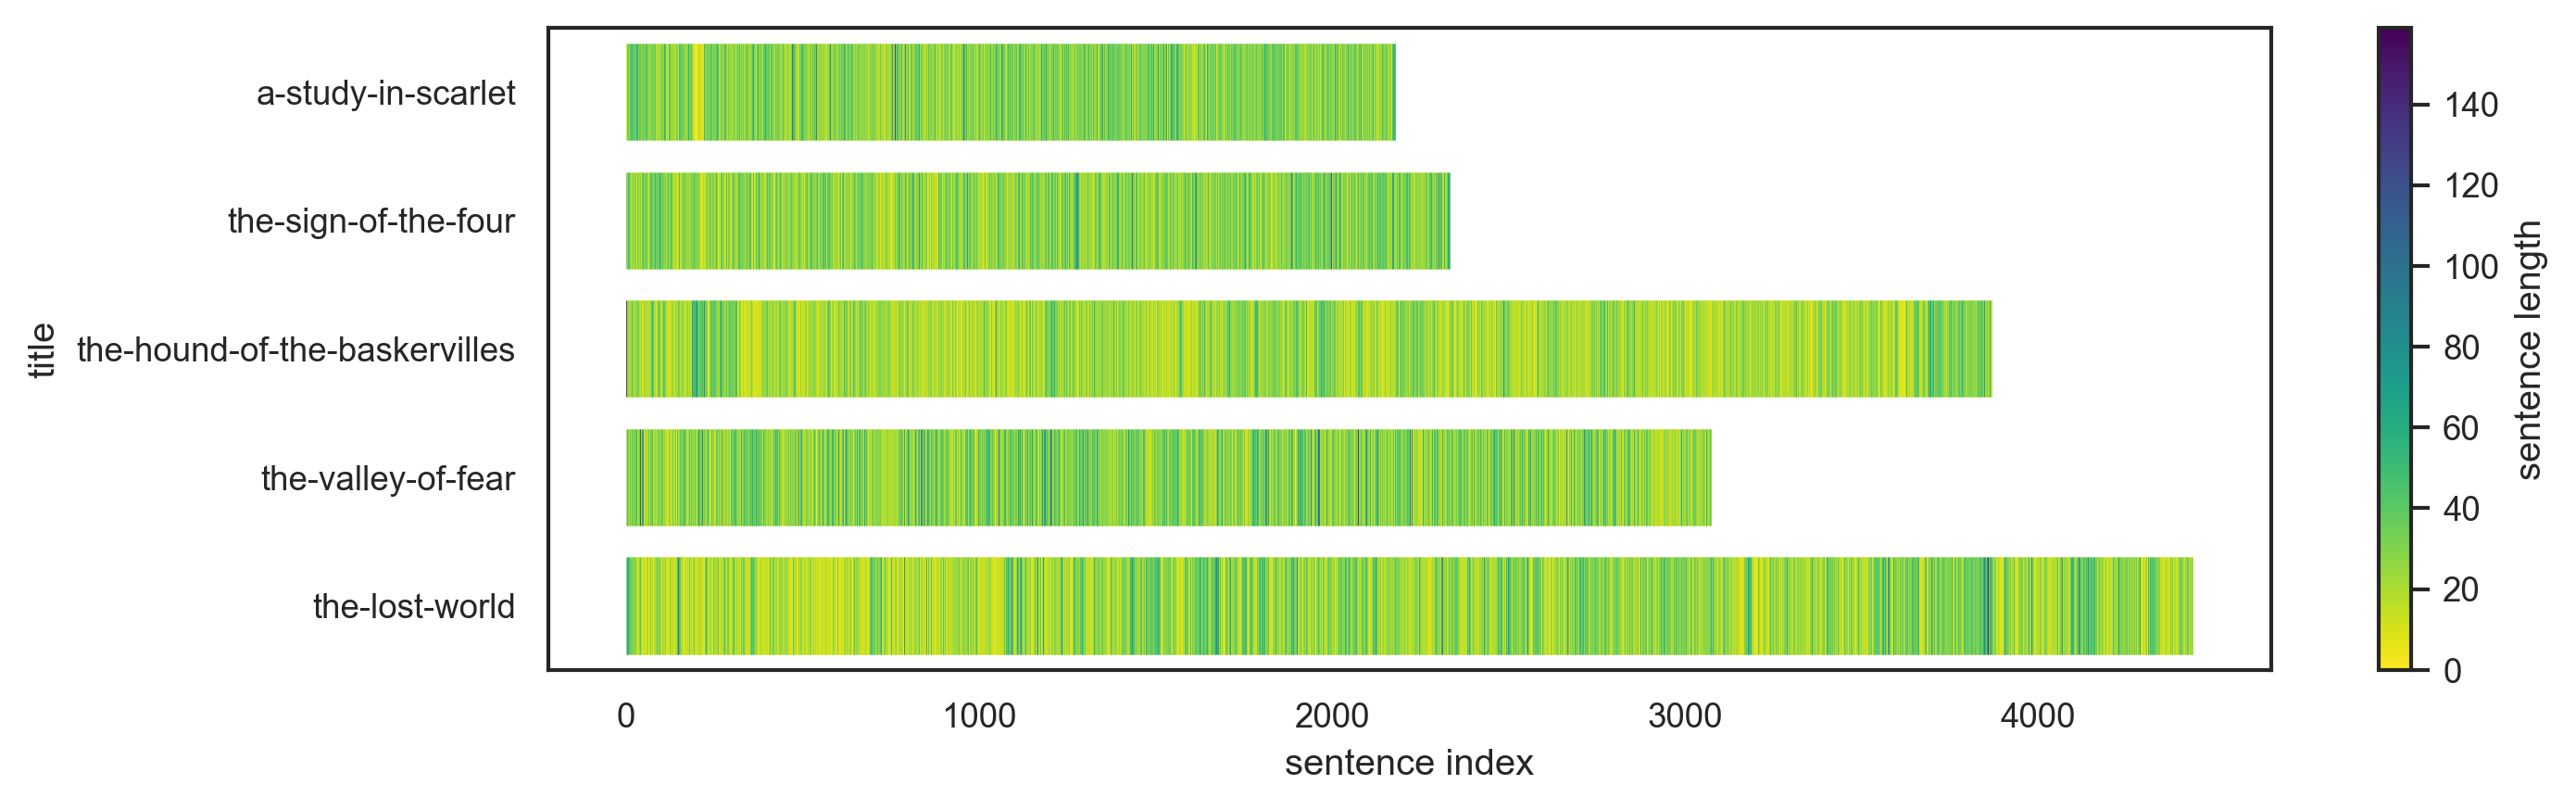

In [8]:
plot_sentences(books_df, book_order, './plots/sentence_lengths_doyle.pdf', max_norm = max_sentence_length)

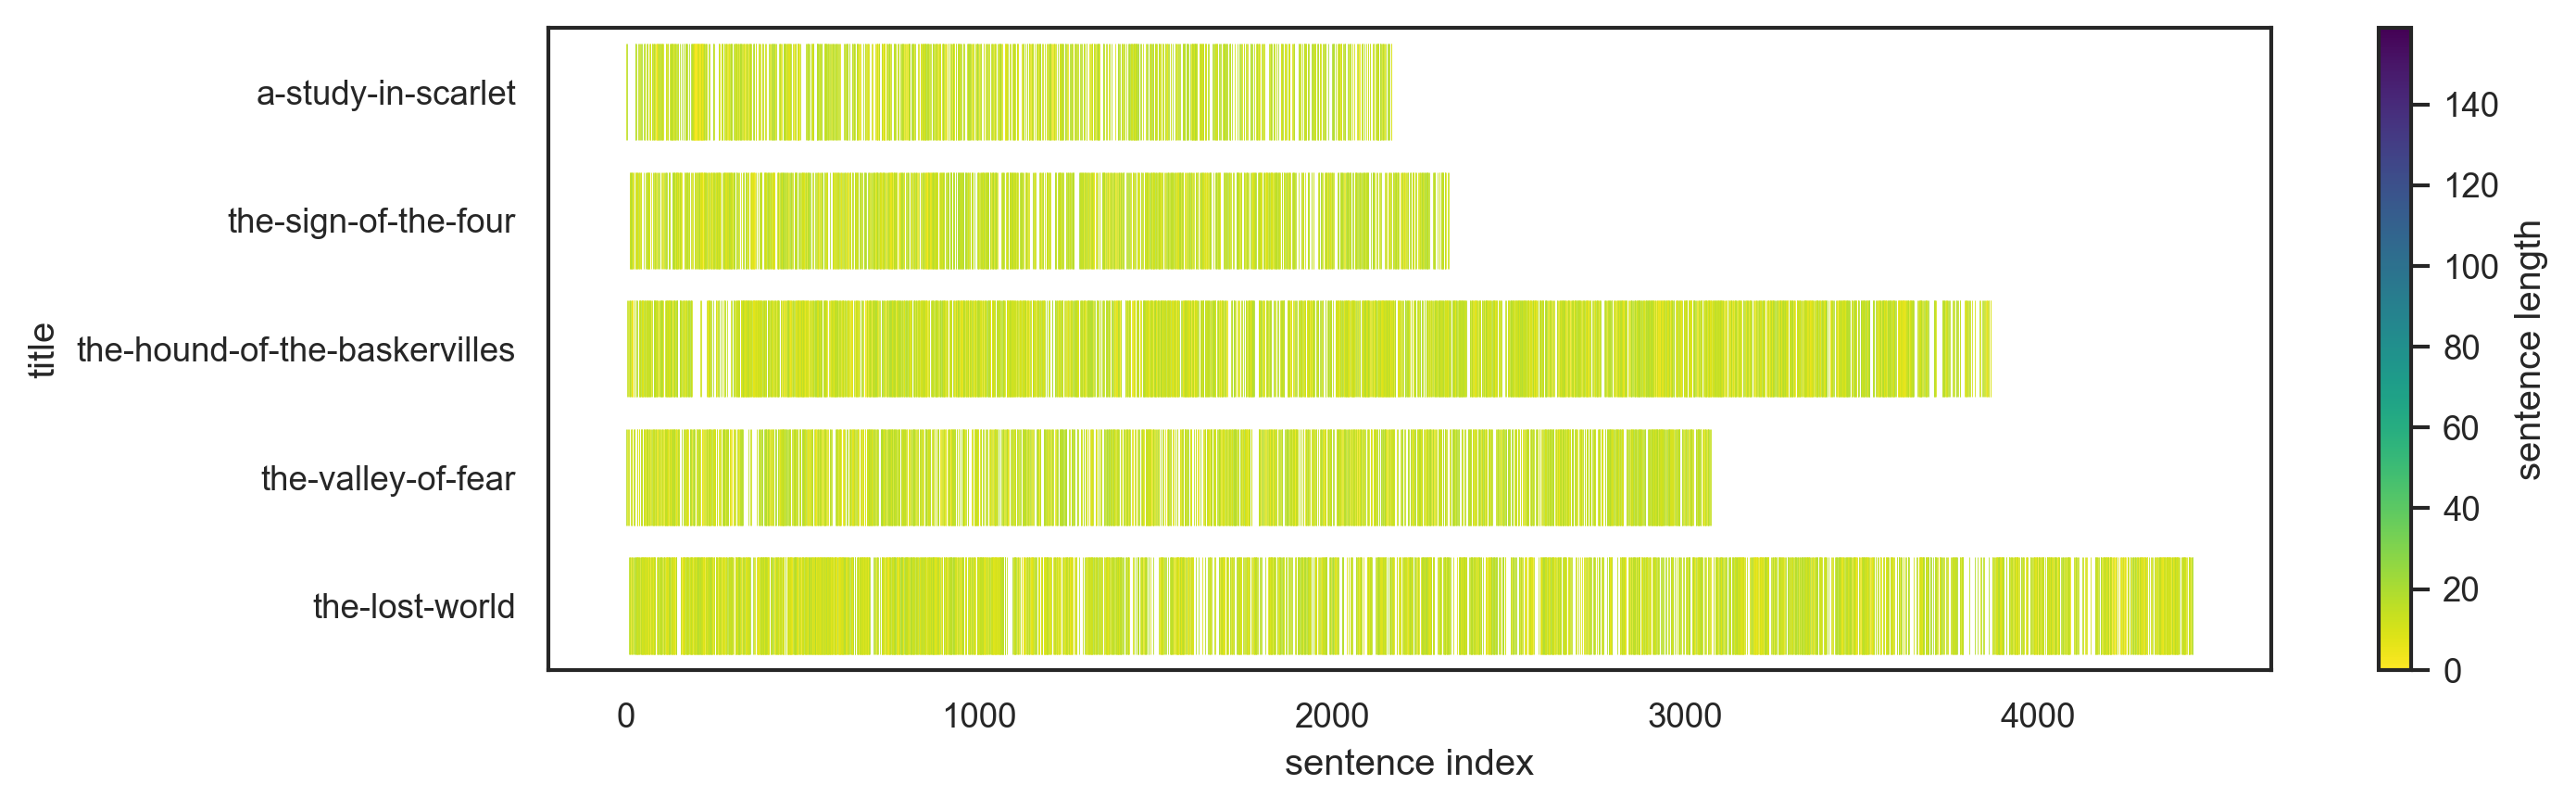

In [9]:
short_sentences_df = books_df[books_df['sentence length'] < 20]
plot_sentences(short_sentences_df, book_order, './plots/short_sentence_lengths_doyle.pdf', max_norm=max_sentence_length)

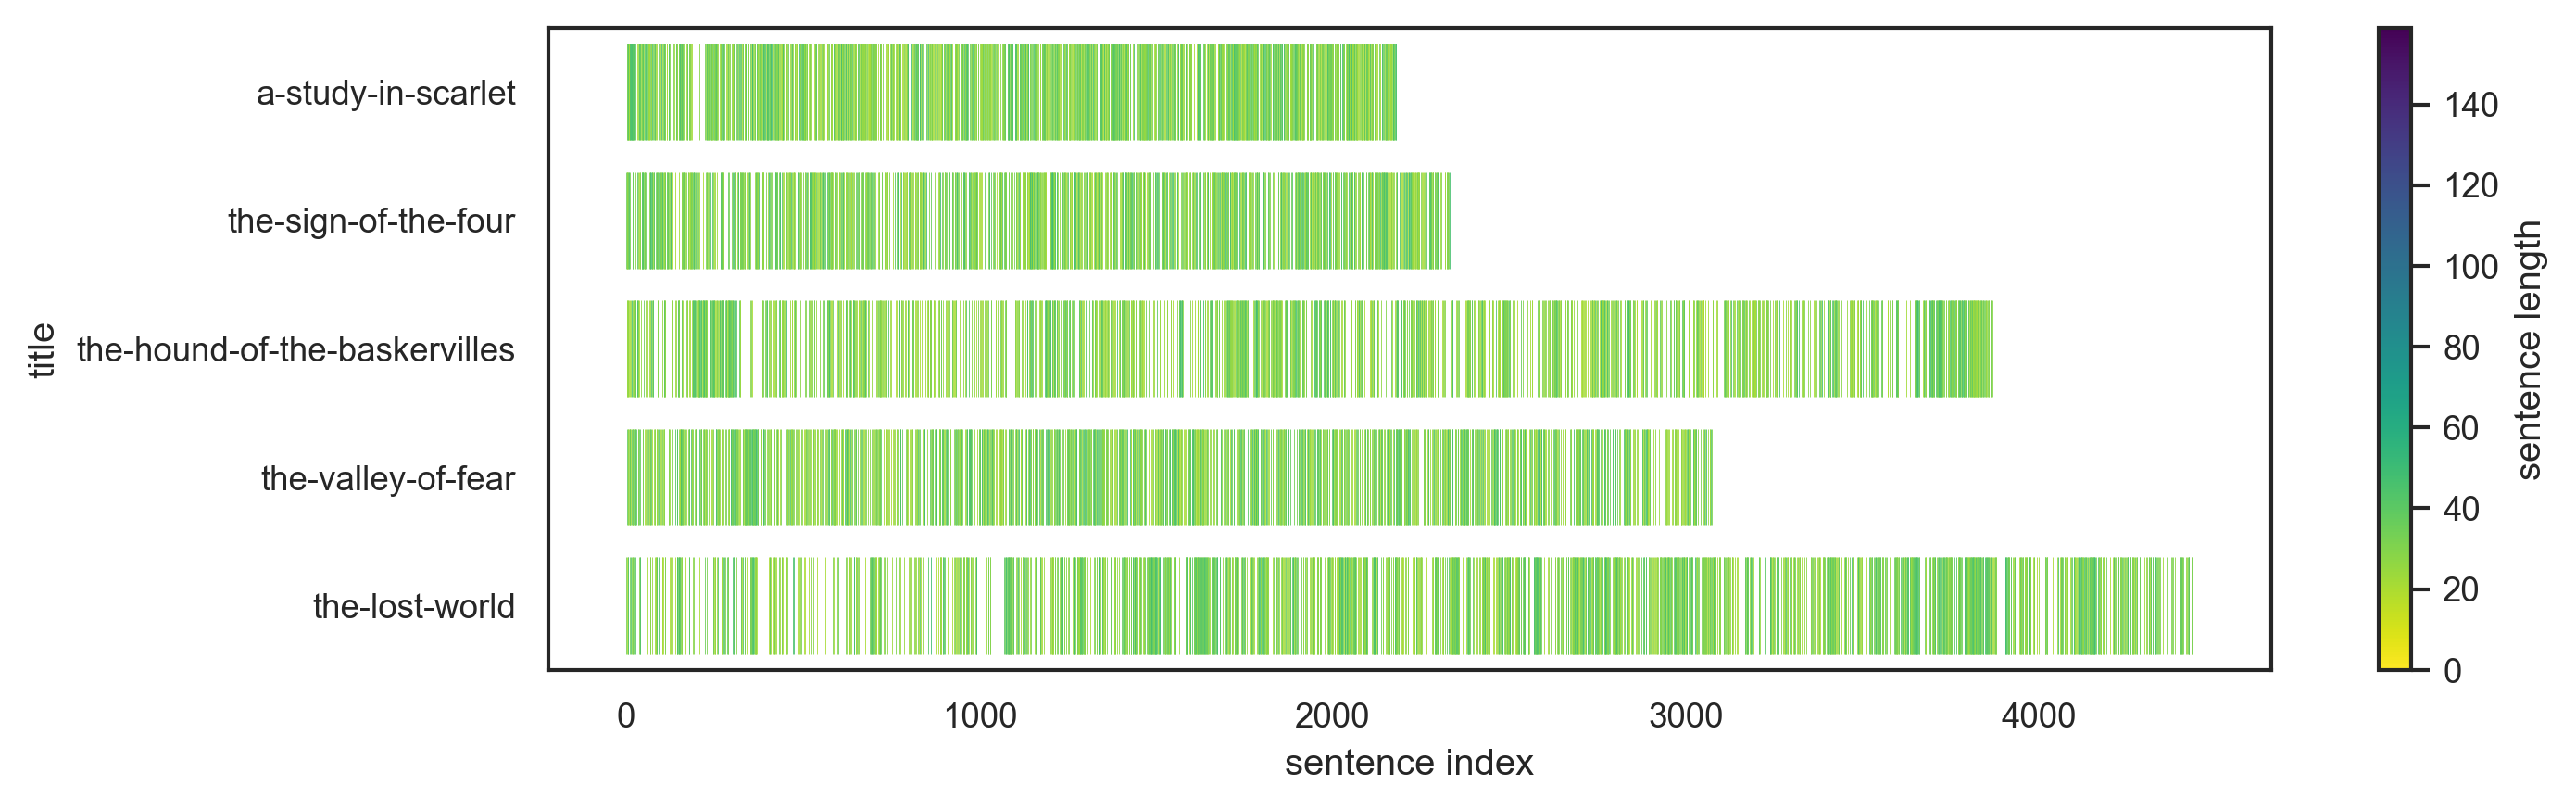

In [10]:
medium_sentences_df = books_df[(books_df['sentence length'] >= 20) & (books_df['sentence length'] < 50)]
plot_sentences(medium_sentences_df, book_order, './plots/medium_sentence_lengths_doyle.pdf', max_norm=max_sentence_length)

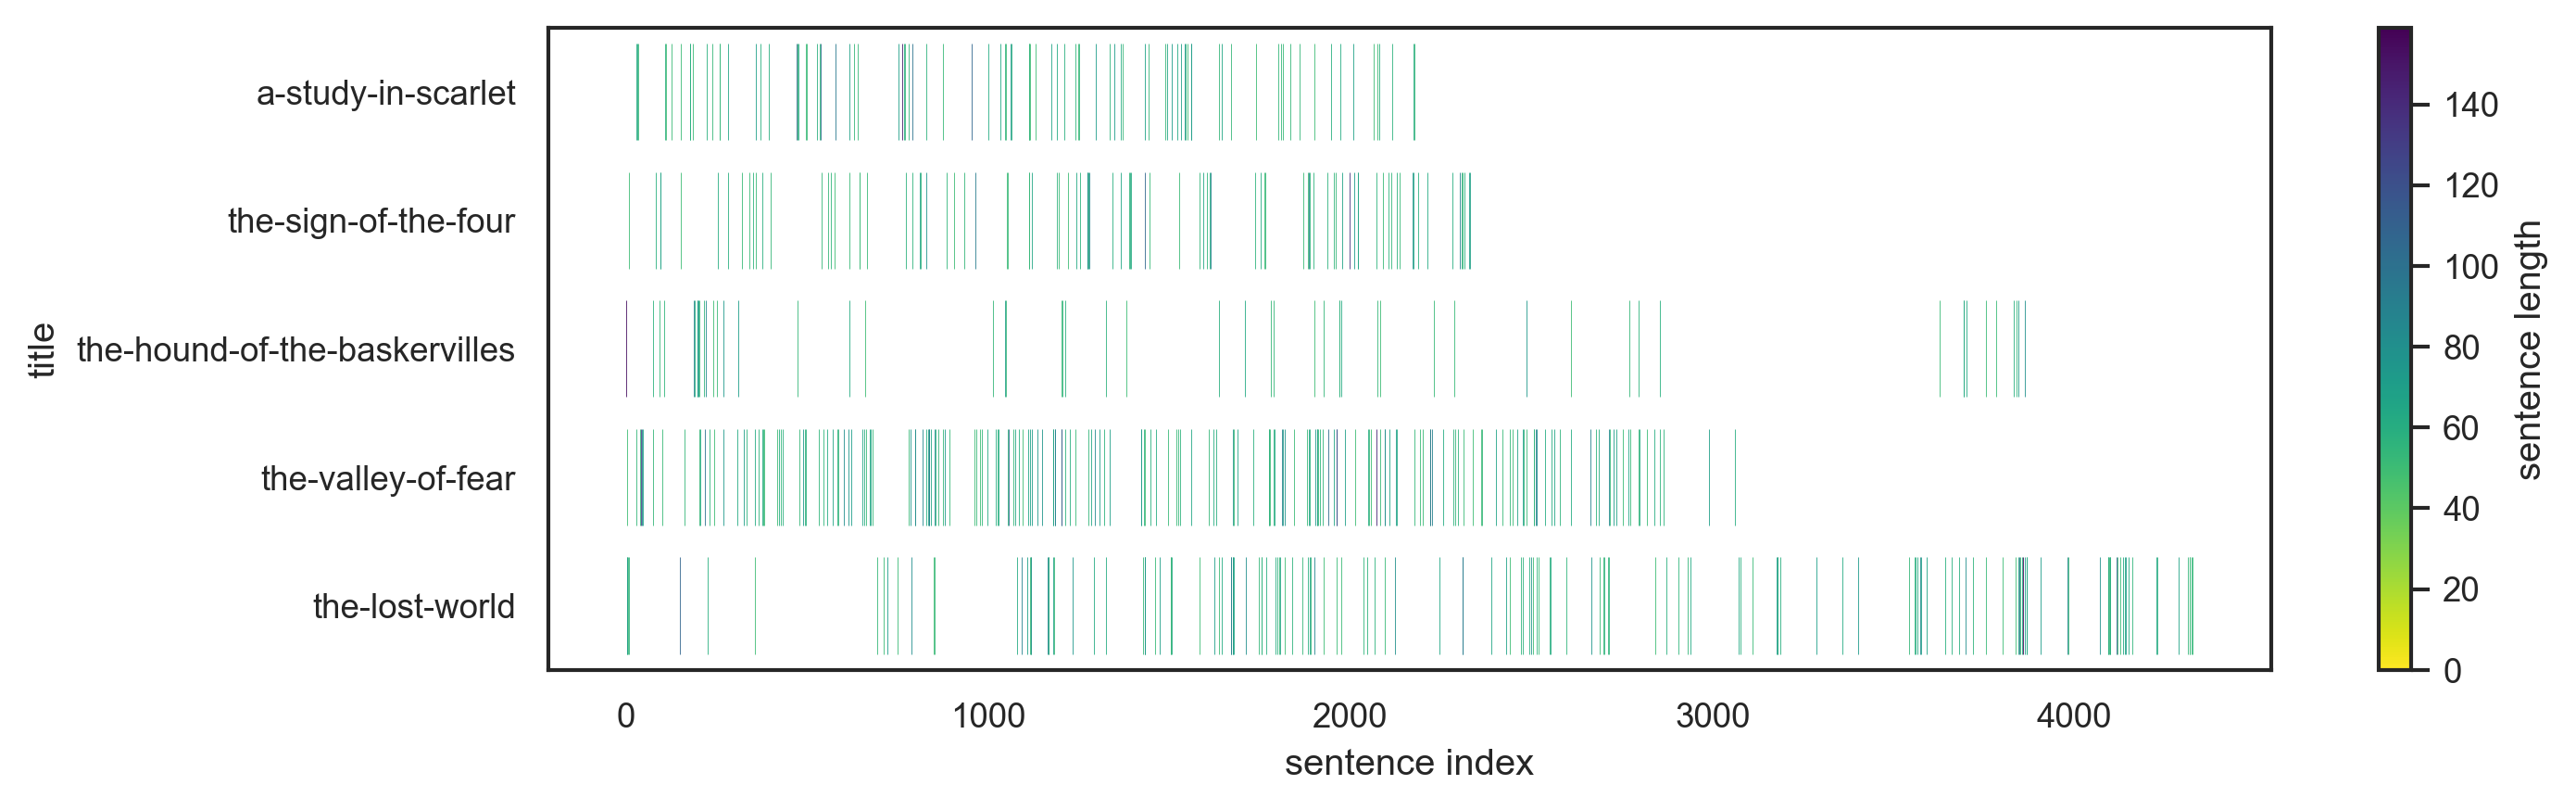

In [11]:
long_sentences_df = books_df[books_df['sentence length'] >= 50]
plot_sentences(long_sentences_df, book_order, './plots/long_sentence_lengths_doyle.pdf', max_norm=max_sentence_length)